# IV deo
### Učitaćemo obrađen dataset iz 2. notebooka. Izvršićemo nekoliko analiza koje ćemo zatim prikazati pomoću biblioteka za vizuelizaciju kao što su seaborn i mathplotlib.

In [24]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

dfr = pd.read_csv('../data/brit_sredjen.csv')
bpa = dfr.groupby('Performer')['loudness'].mean()
bpa = bpa.sort_values(ascending=False)


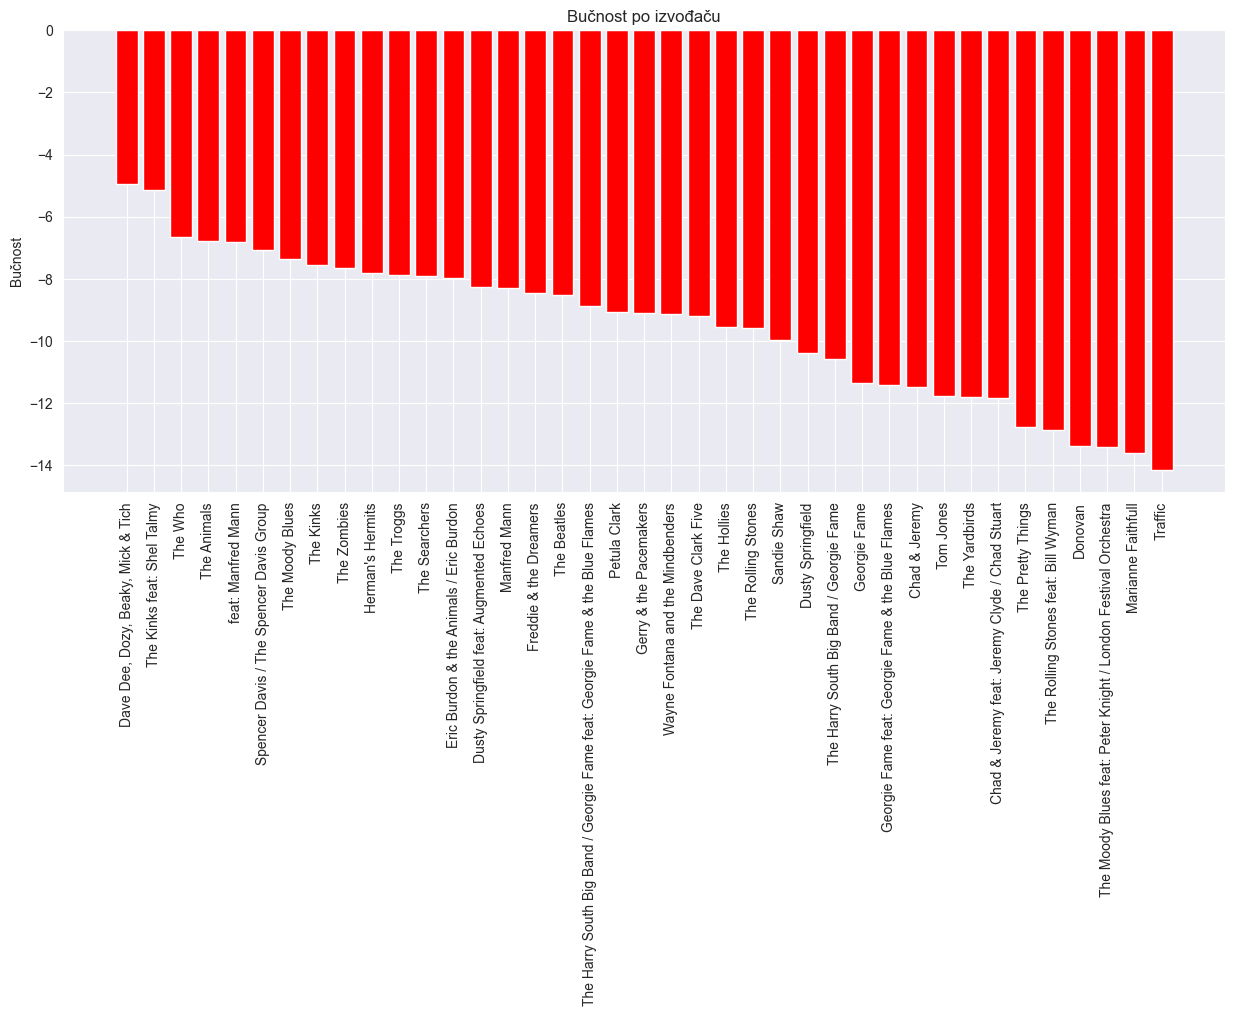

In [25]:
fg,ax = plt.subplots(figsize=(15,6))
ax.bar(bpa.index,bpa.values, color='red')
ax.set_title('Bučnost po izvođaču')
ax.set_ylabel('Bučnost')
ax.tick_params(axis='x',labelrotation=90)
plt.show()